Ибрагим Гульнур CSDA Task 10

In [1]:
!pip install opentsne
!pip install -U scikit-learn
!pip install umap-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Using cached pynndescent-0.5.8.tar.gz (1.1 MB)
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=984f851e207b319eb787b88121764b586b7d271b41783e6f0ab060279be6af8c
  Stored in directory: c:\users\qween\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55512 sha256=5aa7728acd261fac97bbb4206832c521ed4cde7c0d271a4a5efd86e504b48f96
  Stored in directory: c:\users\qween\appdata\local\pip\cache\wheels\b9\89\cc\59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [3]:
from sklearn import datasets
import json
from openTSNE import TSNE
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import umap

%matplotlib inline

# TSNE SECTION and data loading

In [4]:
iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

embedding = TSNE().fit(x)

In [5]:
data = pd.DataFrame(embedding, columns=["Comp1","Comp2"])
data["Label"] = y

In [6]:

with open('data.json', 'w') as f:
    json.dump(np.array(embedding).tolist(), f)

Text(30.94391375000002, 0.5, 'Comp 2')

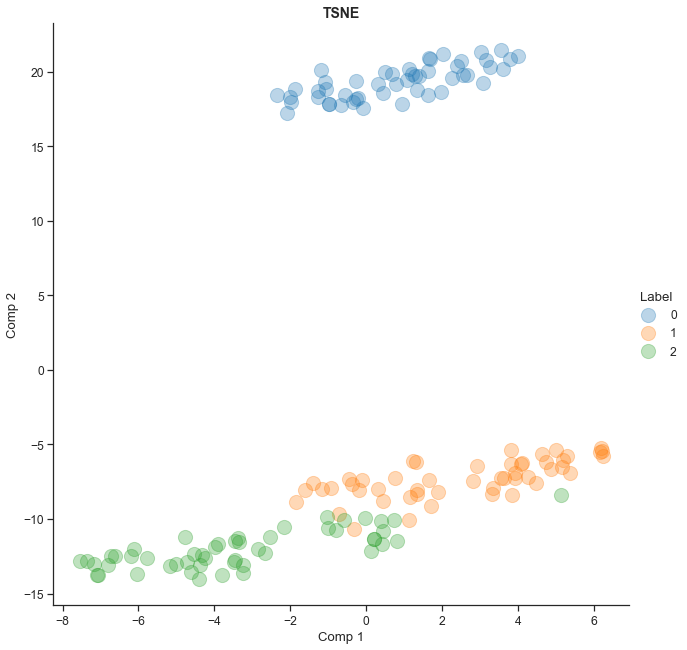

In [9]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Comp1',
           y='Comp2',
           data=data,
           fit_reg=False,
           legend=True,
           height=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3}
          )

plt.title("TSNE", weight='bold').set_fontsize('14')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')

UMAP 

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import Category10

import umap
from sklearn.datasets import load_iris

iris = load_iris()
embedding = umap.UMAP(
    n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(iris.data)

output_file("iris.html")


targets = [str(d) for d in iris.target_names]

source = ColumnDataSource(
    dict(
        x=[e[0] for e in embedding],
        y=[e[1] for e in embedding],
        label=[targets[d] for d in iris.target],
    )
)

cmap = CategoricalColorMapper(factors=targets, palette=Category10[10])

p = figure(title="Test UMAP on Iris dataset")
p.circle(
    x="x",
    y="y",
    source=source,
    color={"field": "label", "transform": cmap},
    legend_label="label",
)

show(p)

C:\Users\qween\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\qween\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


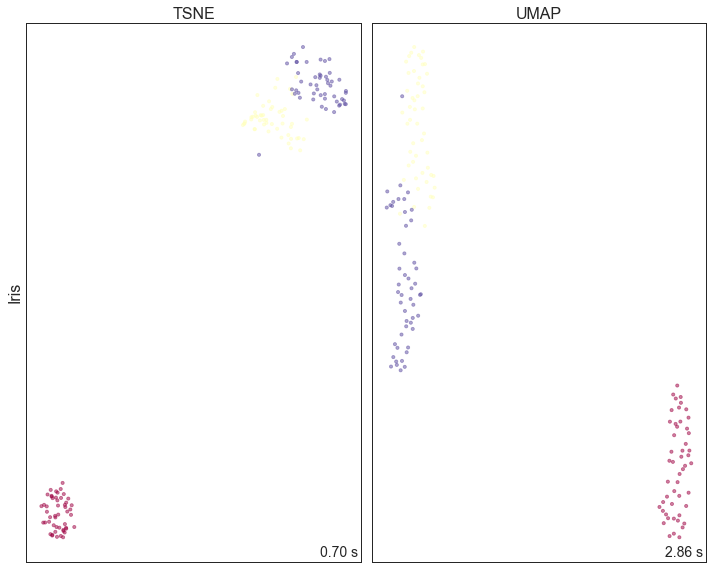

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb

import umap

sns.set(context="paper", style="white")

blobs, blob_labels = datasets.make_blobs(
    n_samples=500, n_features=10, centers=5, random_state=42
)
iris = datasets.load_iris()
digits = datasets.load_digits(n_class=10)
wine = datasets.load_wine()
swissroll, swissroll_labels = datasets.make_swiss_roll(
    n_samples=1000, noise=0.1, random_state=42
)
sphere = np.random.normal(size=(600, 3))
sphere = preprocessing.normalize(sphere)
sphere_hsv = np.array(
    [
        (
            (np.arctan2(c[1], c[0]) + np.pi) / (2 * np.pi),
            np.abs(c[2]),
            min((c[2] + 1.1), 1.0),
        )
        for c in sphere
    ]
)
sphere_colors = np.array([hsv_to_rgb(*c) for c in sphere_hsv])

reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]

test_data = [
    (iris.data, iris.target),
    
]
dataset_names = ["Iris"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []


plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)
all_d = []
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        all_d.append(embedding)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(*embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5)
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")

plt.tight_layout()


import json

all_d = np.array(all_d).tolist()

for idx, j in enumerate(all_d[0]):
  j.append(test_data[0][1][idx])
  

for idx, j in enumerate(all_d[1]):
  
  j.append(test_data[0][1][idx])

  
# for index in range(len(all_d)):
with open('TSNE.json', 'w') as f:
  json.dump(np.array(all_d[0]).tolist(), f)

with open('UMAP.json', 'w') as f:
  json.dump(np.array(all_d[1]).tolist(), f)



In [16]:
all_d[0]

[[-11.73729419708252, -5.193181037902832, 0],
 [-11.040687561035156, -5.541008949279785, 0],
 [-10.989147186279297, -4.953017234802246, 0],
 [-10.842004776000977, -5.057214736938477, 0],
 [-11.696138381958008, -4.734109878540039, 0],
 [-12.389113426208496, -4.9375410079956055, 0],
 [-11.10634994506836, -4.652909755706787, 0],
 [-11.522449493408203, -5.127196788787842, 0],
 [-10.561735153198242, -5.132396697998047, 0],
 [-11.129701614379883, -5.50502872467041, 0],
 [-12.211732864379883, -5.292898654937744, 0],
 [-11.312274932861328, -4.742187023162842, 0],
 [-10.922079086303711, -5.452786922454834, 0],
 [-10.510982513427734, -4.911442279815674, 0],
 [-12.650106430053711, -5.312626838684082, 0],
 [-12.788432121276855, -4.932371616363525, 0],
 [-12.374320983886719, -5.061459541320801, 0],
 [-11.757293701171875, -5.155887126922607, 0],
 [-12.50767993927002, -5.310382843017578, 0],
 [-12.019843101501465, -4.709031581878662, 0],
 [-11.974869728088379, -5.611805438995361, 0],
 [-11.9470043182